# 전복 나이 예측
[데이콘](https://dacon.io/competitions/official/235877/overview/description)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/study/데이콘/임소연/전복

/content/drive/.shortcut-targets-by-id/1sa3E1r6eMXnzqqXE9EkHzWBh2ZLU56y3/study/데이콘/임소연/전복


In [3]:
import pandas as pd

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

In [4]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


## 전처리

In [5]:
train['Gender'] = train['Gender'].astype('category').cat.codes
test['Gender'] = test['Gender'].astype('category').cat.codes

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   int8   
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), int8(1)
memory usage: 89.5 KB


In [7]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,2,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,1,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,2,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,1,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [8]:
train.describe()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,627.000000,1.071030,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,361.854252,0.820406,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,1.000000,0.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,314.000000,0.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,627.000000,1.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,940.000000,2.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,1253.000000,2.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


## 시각화

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

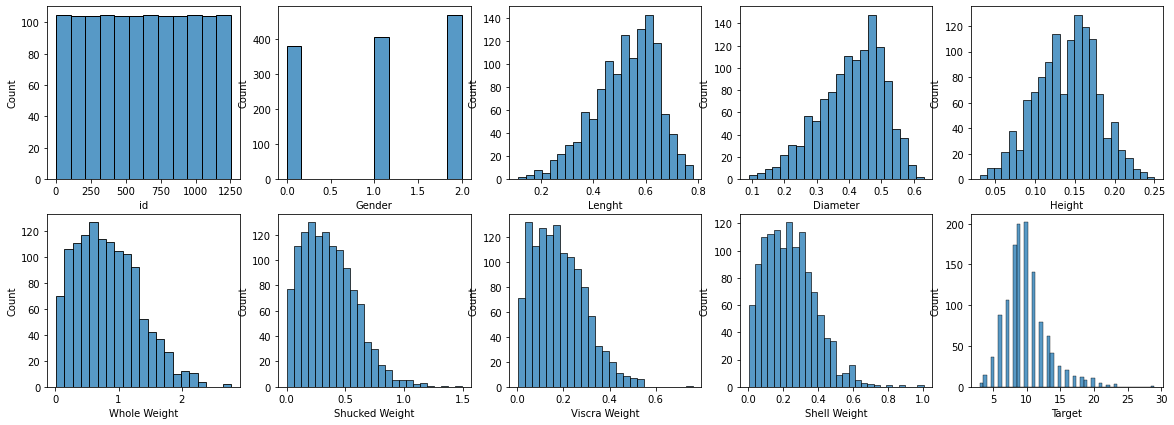

In [10]:
f, ax = plt.subplots(2,5, figsize=(20,7))
ax = ax.flatten()
col_list = list(train.columns)
for i in range(len(col_list)):
  sns.histplot(data=train, x= col_list[i],ax=ax[i])
plt.show()

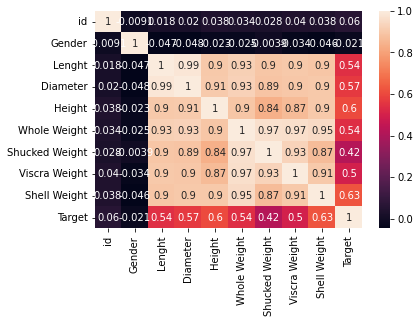

In [11]:
sns.heatmap(train.corr(), annot = True)

In [12]:
train.drop(['id', 'Gender'], axis = 1, inplace = True)
test.drop(['id', 'Gender'], axis = 1, inplace = True)

## 모델링

### pycaret

In [13]:
#!pip install pycaret

In [14]:
from pycaret.regression import *

df = setup(data = train, target = 'Target', train_size=0.8, session_id = 1115)

,Description,Value
0,session_id,1115
1,Target,Target
2,Original Data,"(1253, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1002, 7)"


In [15]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.6102,5.5565,2.3453,0.4817,0.1911,0.1540,0.041
lr,Linear Regression,1.6643,5.4067,2.3154,0.4944,0.1889,0.1678,0.318
lar,Least Angle Regression,1.6643,5.4066,2.3154,0.4944,0.1889,0.1678,0.013
br,Bayesian Ridge,1.6643,5.4041,2.3149,0.4946,0.1890,0.1678,0.013
rf,Random Forest Regressor,1.6886,5.6696,2.3744,0.4707,0.1923,0.1683,0.601
knn,K Neighbors Regressor,1.6893,5.7616,2.3922,0.4632,0.1953,0.1670,0.061
et,Extra Trees Regressor,1.6967,5.6594,2.3707,0.4711,0.1912,0.1693,0.455
ridge,Ridge Regression,1.6981,5.6121,2.3594,0.4760,0.1966,0.1721,0.011
gbr,Gradient Boosting Regressor,1.7346,5.9933,2.4397,0.4418,0.1950,0.1709,0.263
lightgbm,Light Gradient Boosting Machine,1.7671,5.9807,2.4404,0.4397,0.1985,0.1751,0.164


In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 1115, shuffle = True)

In [18]:
from sklearn.metrics import mean_squared_error

In [23]:
X = train.drop('Target',axis = 1)
y = train['Target']
target = test

In [17]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression

### Huber Regressor

In [24]:
huber = HuberRegressor().fit(X, y)

In [25]:
huber_pred = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    huber.fit(tr_x, tr_y)
    pred = huber.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = huber.predict(target) / 10
    huber_pred += sub_pred
print(f'{huber.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

HuberRegressor의 10fold 평균 NMAE는 0.5354788346653223


In [37]:
submission['Target'] = huber_pred
submission.to_csv('huber1.csv',index = False)

### Linear Regression

In [62]:
lr = LinearRegression().fit(X, y)

In [63]:
lr_pred = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lr.fit(tr_x, tr_y)
    pred = lr.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = lr.predict(target) / 10
    lr_pred += sub_pred
print(f'{lr.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

LinearRegression의 10fold 평균 NMAE는 0.5208505937517176


In [65]:
submission['Target'] = lr_pred
submission.to_csv('lr1.csv',index = False)

### Least Angle Regression

In [69]:
from sklearn import linear_model
lar = linear_model.Lars().fit(X, y)

In [70]:
lar_pred = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lar.fit(tr_x, tr_y)
    pred = lar.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = lar.predict(target) / 10
    lar_pred += sub_pred
print(f'{lar.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

Lars의 10fold 평균 NMAE는 0.5208505937517177


### Random Forest Regressor
[참고](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor(random_state=1115, criterion='mae').fit(X, y)

In [55]:
rf_pred = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    pred = rf.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = rf.predict(target) / 10
    rf_pred += sub_pred
print(f'{rf.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

RandomForestRegressor의 10fold 평균 NMAE는 0.5431032251976627


In [42]:
submission['Target'] = rf_pred
submission.to_csv('rf1.csv',index = False)

#### Randomize Search CV

In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [46]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [49]:
rf2 = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=5, n_estimators=200).fit(X, y)
rf2_pred = rf2.predict(target)

In [52]:
submission['Target'] = rf2_pred
submission.to_csv('rf2.csv',index = False)

In [53]:
rf_pred2 = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf2.fit(tr_x, tr_y)
    pred = rf2.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = rf2.predict(target) / 10
    rf_pred2 += sub_pred
print(f'{rf2.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

RandomForestRegressor의 10fold 평균 NMAE는 0.5269592909188889


#### Grid Search CV

In [56]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 10.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [59]:
rf3 = RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300).fit(X, y)
rf3_pred = rf3.predict(target)

In [60]:
submission['Target'] = rf3_pred
submission.to_csv('rf3.csv',index = False)

In [61]:
rf_pred3 = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf3.fit(tr_x, tr_y)
    pred = rf3.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = rf3.predict(target) / 10
    rf_pred3 += sub_pred
print(f'{rf3.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

RandomForestRegressor의 10fold 평균 NMAE는 0.5119840828142679


### Gradient Boosting Regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 1115, max_depth = 5)

In [73]:
gbr_pred = np.zeros((target.shape[0]))
nmae_list = []
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbr.fit(tr_x, tr_y)
    pred = gbr.predict(val_x)

    nmae = mean_squared_error(val_y, pred) / np.mean(np.abs(val_y))
    nmae_list.append(nmae)
    
    sub_pred = gbr.predict(target) / 10
    gbr_pred += sub_pred
print(f'{gbr.__class__.__name__}의 10fold 평균 NMAE는 {np.mean(nmae_list)}')

GradientBoostingRegressor의 10fold 평균 NMAE는 0.5739637086418272


### Ensemble

| 모델              | NMAE score             |
| ----------------- | ---------------------- |
| Huber             | 0.5354788346653223     |
| Linear            | 0.5208505937517176     |
| Least Angle       | 0.5208505937517177     |
| Random Forest 1   | 0.5431032251976627     |
| Random Forest 2   | 0.5269592909188889     |
| Random Forest 3   | **0.5119840828142679** |
| Gradient Boosting | 0.5739637086418272     |

In [74]:
submission['Target'] = (rf3_pred + lr_pred + huber_pred) / 3
submission.to_csv('rf_lr_hb.csv', index=False)